In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import scipy.io
import timeit
plt.style.use('seaborn')


@jit(nopython=True)
def th(x, c): 
    if 0 <= x <= c: 
        return x / c
    else:  
        return 1
    

@jit(nopython=True)
def information_flow(num_queues, num_sim, t1, t2, delta_t, 
                     input_rate, inter_rate, c):
    """
    num_queues -- number of queues.
    num_sim -- number of simulations.
    input_rate -- the rate at which customers arrive.
    inter_rate -- inter-stage rate.
    delta_t -- time step.
    c -- number of servers in each queue.
    """
    s_aver = np.zeros((t1+1, num_queues))
    for simulation in range(num_sim):
        s = np.zeros(num_queues)   # Initial allocation is zero. 
        num_nonzero = 0    # Number of not occupied cells  
        for num_slices in range(t1): 
            for time in range(t2):
                random_array = np.random.rand(num_nonzero+2) 
                if random_array[0] <= input_rate * delta_t:                                           
                    s[0] = s[0] + 1
                for i in range(num_nonzero+1):
                    if random_array[i+1] <= inter_rate * th(s[i], c) * delta_t: 
                        s[i] = s[i] - 1                                
                        s[i+1] = s[i+1] + 1
                if s[num_nonzero] > 0 and num_nonzero < num_queues:
                    num_nonzero += 1
            s_aver[num_slices+1, :] = s_aver[num_slices+1, :] + s
    return s_aver/num_sim


# Plots
[num_queues, num_sim] = [50, 5000]
[t1, t2, dt] = [50000, 1, 0.0001]
[input_rate, inter_rate, c] = [6, 10, 1]
real_time = t1*t2*dt
s_aver = information_flow(num_queues, num_sim, t1, t2, dt, 
                          input_rate, inter_rate, c)
# Save file for MATLAB
scipy.io.savemat('1061.mat', mdict={'s_aver': s_aver})

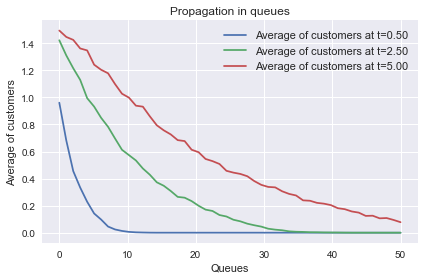

In [74]:
t = np.linspace(0, t1*t2*dt, t1+1)
x = np.linspace(0, num_queues, num_queues)
fig, ax = plt.subplots(figsize=(6,4))
T = [t1//10, t1//2, t1]
ax.cla()
ax.plot(x, s_aver[T[0],:], label='Average of customers at t=%1.2f'%(T[0]*dt))
ax.plot(x, s_aver[T[1],:], label='Average of customers at t=%1.2f'%(T[1]*dt))
ax.plot(x, s_aver[T[2],:], label='Average of customers at t=%1.2f'%(T[2]*dt))
ax.set_title('Propagation in queues')
ax.set_ylabel('Average of customers')
ax.set_xlabel('Queues')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('1061.png')

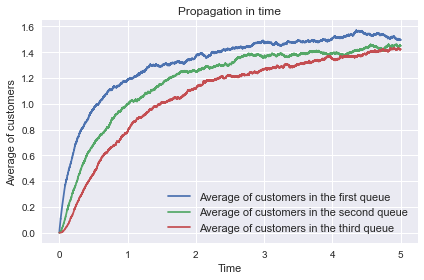

In [75]:
fig, ax = plt.subplots(figsize=(6,4))
ax.cla()
ax.plot(t, s_aver[:,0], label='Average of customers in the first queue')
ax.plot(t, s_aver[:,1], label='Average of customers in the second queue')
ax.plot(t, s_aver[:,2], label='Average of customers in the third queue')
ax.set_title('Propagation in time')
ax.set_ylabel('Average of customers')
ax.set_xlabel('Time')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('1061.png')

Since the number of servers is the same at each queue, all queues will have the same mean at stationary.